In [72]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

wavelength_c = 825e-9
D = 2.3631
mas_per_lamD = (wavelength_c/D)*(180/np.pi)*3.6*10**6

# define desired PSF dimensions and pixelscale in units of lambda/D
npsf = 150  
psf_pixelscale_mas=20.8 # output image dimension (must be power of 2)
psf_pixelscale_lamD = psf_pixelscale_mas/mas_per_lamD  # output sampling in lam0/D

# define the offsets in lambda/D for which the PSFs will be created
start = 0
stop = 11
step = 0.05
offsets_lamD = np.arange(start,stop+step,step)
offsets_mas = offsets_lamD*mas_per_lamD
print(len(offsets_lamD))

polaxis = 10

ndisk = 150
disk_pixelscale_mas = 20.8
disk_pixelscale_lamD=disk_pixelscale_mas/mas_per_lamD

iwa =6
owa = 20
iwa_mas = iwa*mas_per_lamD
owa_mas = owa*mas_per_lamD

221


In [2]:
owa_mas

1440.213830594173

In [73]:
def diskinimg(File_array):
    files=File_array
    l=len(files)
    xpix=(np.arange (-75, 75, 1))*20.8
    ypix=(np.arange (-75, 75, 1))*20.8
    figr=[]
    for i in range(0,l):
        I0=fits.getdata(files[i]+'I_0_spc.fits')
        I90=fits.getdata(files[i]+'I_90_spc.fits')
        I45=fits.getdata(files[i]+'I_45_spc.fits')
        I135=fits.getdata(files[i]+'I_135_spc.fits')
        
        px=128-75
        py=128+75
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        circ1=Circle((0, 0), iwa_mas, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'pol_int_disk'+'.pdf'
        
        fig = plt.figure(figsize=(25, 12))
        ax1=fig.add_subplot(141)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im1=ax1.imshow(disk0,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('mas',fontsize=18)
        ax1.set_xlabel('mas',fontsize=18)
        ax1.set_title('$I_0$',fontsize=18)
        cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax2=fig.add_subplot(142)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im2=ax2.imshow(disk90,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('mas',fontsize=18)
        ax2.set_xlabel('mas',fontsize=18)
        ax2.set_title('$I_{90}$',fontsize=18)
        cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        ax3=fig.add_subplot(143)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im3=ax3.imshow(disk45,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('mas',fontsize=18)
        ax3.set_xlabel('mas',fontsize=18)
        ax3.set_title('$I_{45}$',fontsize=18)
        cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax4=fig.add_subplot(144)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im4=ax4.imshow(disk135,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('mas',fontsize=18)
        ax4.set_xlabel('mas',fontsize=18)
        ax4.set_title('$I_{135}$',fontsize=18)
        cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        fig.subplots_adjust(hspace=0.1, wspace=0.45, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

In [74]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/'
Inc=['best_SED_Mie/']
n=len(Inc)
Inc_dir=[]
for i in range(0,n):
    i_dir=Main_dir+Inc[i]
    Inc_dir.append(i_dir)

In [16]:
Inc_dir[0]

'/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_Mie/'

[<Figure size 2500x1200 with 8 Axes>]

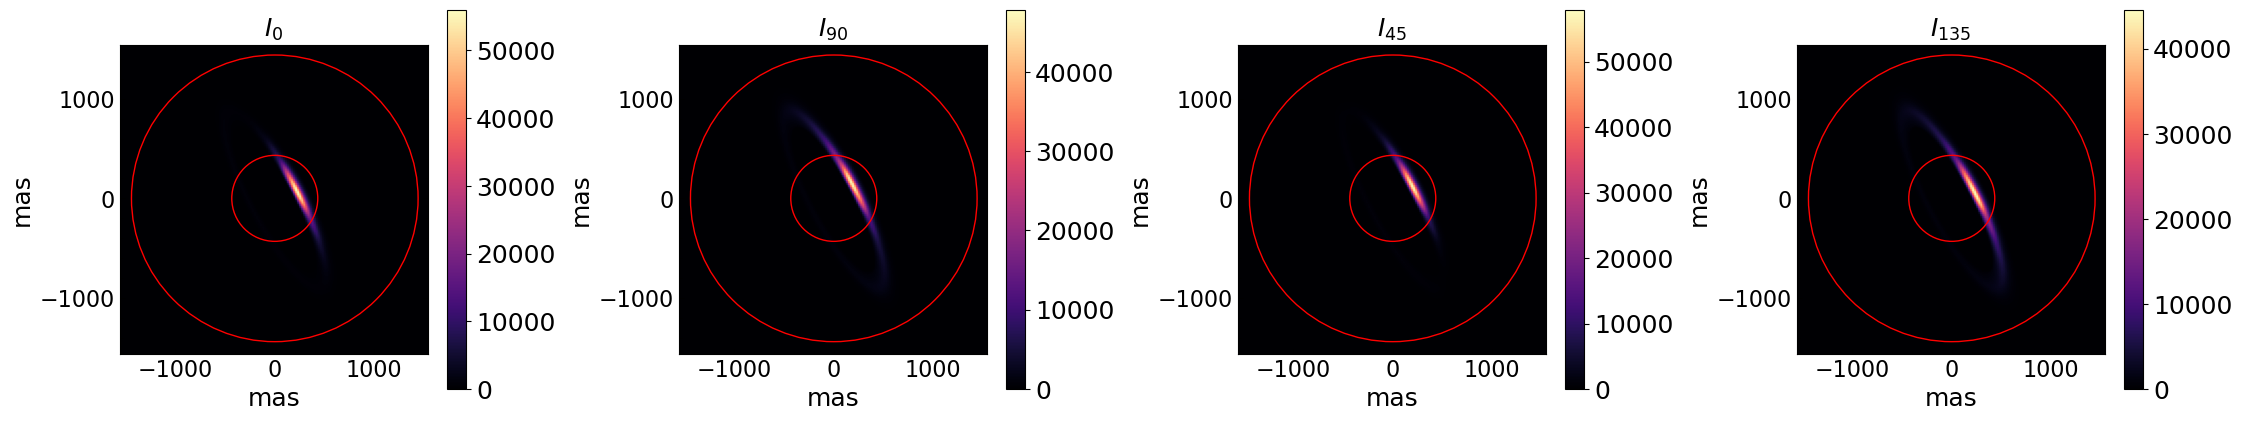

In [75]:
diskinimg(Inc_dir)

In [76]:
def disksimimages(File_array):
    files=File_array
    l=len(files)
    ipsf_fpath = Path('/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Roman_psf/Hpc_run/final_psfs/spcw_band4_ipsfs_paper.hdf5')
    f = h5py.File(ipsf_fpath, 'r')
    ipsf_matrix = np.array(f['ipsf_matrix'])
    f.close()
    figr=[]
    xpix=(np.arange (-75, 75, 1))*psf_pixelscale_mas/1000
    ypix=(np.arange (-75, 75, 1))*psf_pixelscale_mas/1000
    for i in range(0,l):
        
        I0=fits.getdata(files[i]+'I_0_spc.fits')
        I90=fits.getdata(files[i]+'I_90_spc.fits')
        I45=fits.getdata(files[i]+'I_45_spc.fits')
        I135=fits.getdata(files[i]+'I_135_spc.fits')
        
        px=128-75
        py=128+75
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        disk0_sim=np.reshape(ipsf_matrix.dot(disk0.flatten()), (npsf,npsf))
        disk90_sim=np.reshape(ipsf_matrix.dot(disk90.flatten()), (npsf,npsf))
        disk45_sim=np.reshape(ipsf_matrix.dot(disk45.flatten()), (npsf,npsf))
        disk135_sim=np.reshape(ipsf_matrix.dot(disk135.flatten()), (npsf,npsf))
        
        I_0_image = fits.PrimaryHDU(disk0_sim)
        I_90_image= fits.PrimaryHDU(disk90_sim)
        I_45_image= fits.PrimaryHDU(disk45_sim)
        I_135_image= fits.PrimaryHDU(disk135_sim)
        I_0_hdul = fits.HDUList([I_0_image])
        I_90_hdul = fits.HDUList([I_90_image])
        I_45_hdul = fits.HDUList([I_45_image])
        I_135_hdul = fits.HDUList([I_135_image])
        I_0_hdul.writeto(files[i]+'disk_0.fits',overwrite=True)
        I_90_hdul.writeto(files[i]+'disk_90.fits',overwrite=True)
        I_45_hdul.writeto(files[i]+'disk_45.fits',overwrite=True)
        I_135_hdul.writeto(files[i]+'disk_135.fits',overwrite=True)
        
        circ1=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'pol_disk_sim_hr4796'+'.pdf'
        
        fig = plt.figure(dpi=200)
        ax1=fig.add_subplot(221)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5)
        im1=ax1.imshow(disk0_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('arcsec')
        ax1.set_xlabel('arcsec')
        ax1.set_title('$I_0$')
        cb = fig.colorbar(im1,orientation='vertical')
        #cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s")

        ax2=fig.add_subplot(222)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5)
        im2=ax2.imshow(disk90_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('arcsec')
        ax2.set_xlabel('arcsec')
        ax2.set_title('$I_{90}$')
        cb = fig.colorbar(im2,orientation='vertical')
        #cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s")
        
        ax3=fig.add_subplot(223)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5)
        im3=ax3.imshow(disk45_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('arcsec')
        ax3.set_xlabel('arcsec')
        ax3.set_title('$I_{45}$')
        cb = fig.colorbar(im3,orientation='vertical')
        #cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s")

        ax4=fig.add_subplot(224)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5)
        im4=ax4.imshow(disk135_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('arcsec')
        ax4.set_xlabel('arcsec')
        ax4.set_title('$I_{135}$')
        cb = fig.colorbar(im4,orientation='vertical')
        #cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s")
        
        fig.subplots_adjust(hspace=0.4, wspace=0.3, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

[<Figure size 1280x960 with 8 Axes>]

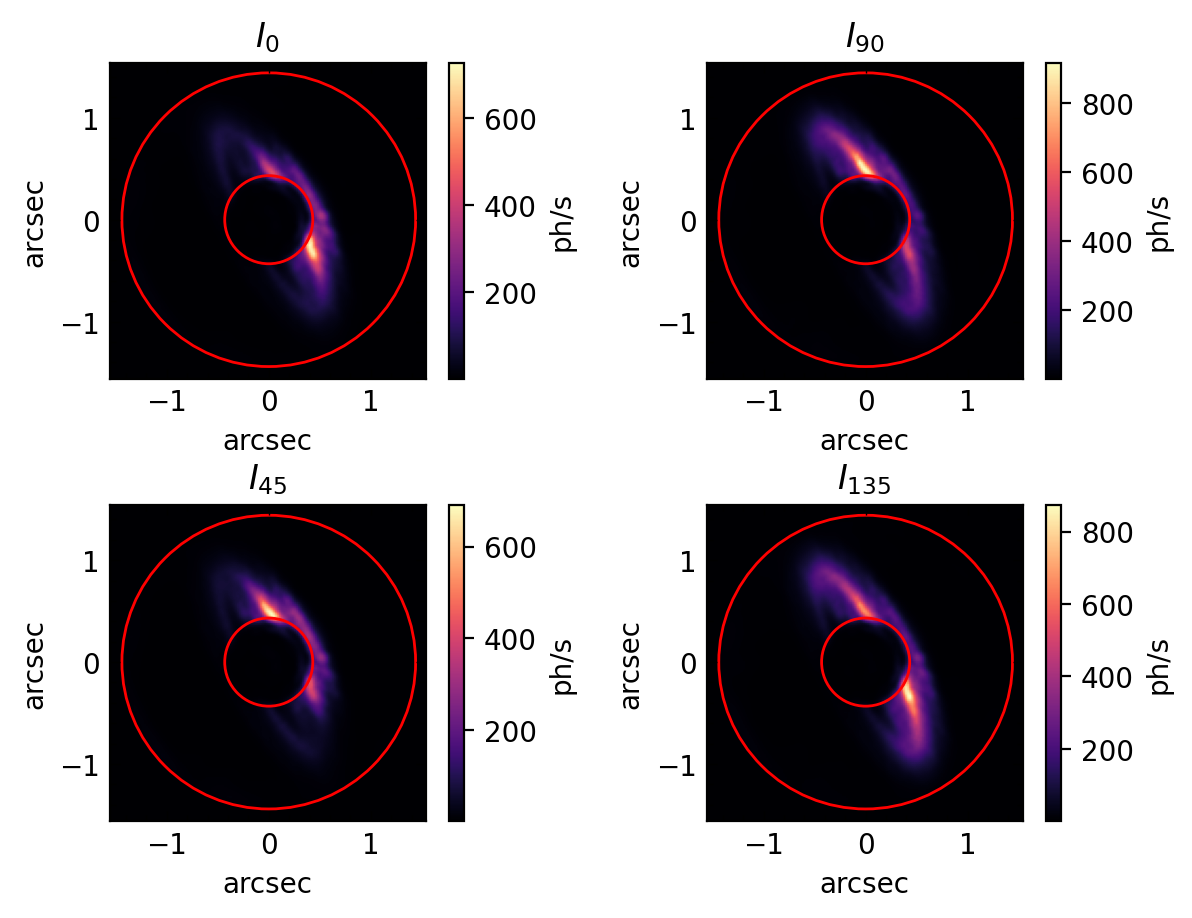

In [77]:
disksimimages(Inc_dir)

In [83]:
def disksimagespol(File_array):
    files=File_array
    l=len(files)
    ipsf_fpath = Path('/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Roman_psf/Hpc_run/final_psfs/spcw_band4_ipsfs_paper.hdf5')
    f = h5py.File(ipsf_fpath, 'r')
    ipsf_matrix = np.array(f['ipsf_matrix'])
    f.close()
    figr=[]
    xpix=(np.arange (-75, 75, 1))*psf_pixelscale_mas/1000
    ypix=(np.arange (-75, 75, 1))*psf_pixelscale_mas/1000
    for i in range(0,l):
        
        I0=fits.getdata(files[i]+'I_0_spc.fits')
        I90=fits.getdata(files[i]+'I_90_spc.fits')
        I45=fits.getdata(files[i]+'I_45_spc.fits')
        I135=fits.getdata(files[i]+'I_135_spc.fits')
        
        px=128-75
        py=128+75
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        disk0_sim=np.reshape(ipsf_matrix.dot(disk0.flatten()), (npsf,npsf))
        disk90_sim=np.reshape(ipsf_matrix.dot(disk90.flatten()), (npsf,npsf))
        disk45_sim=np.reshape(ipsf_matrix.dot(disk45.flatten()), (npsf,npsf))
        disk135_sim=np.reshape(ipsf_matrix.dot(disk135.flatten()), (npsf,npsf))
        
        
        Q=(disk0_sim-disk90_sim)
        U=(disk45_sim-disk135_sim)
        I_out=disk0_sim+disk90_sim
        np.seterr(invalid='ignore')
        psf_scale=0.0208
        sq_as_per_pix=psf_scale**2
        A=2.5*np.log10(sq_as_per_pix)
        C=20.30 

        X, Y = np.mgrid[(0):(150):150j, (0):(150):150j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        pos=np.transpose(positions)

        Phi=np.arctan((pos[:,0]-75)/(pos[:,1]-75))
        Phi_new=np.reshape(Phi,(150,150))

        Q_phi=Q*np.cos(2*Phi_new)+U*np.sin(2*Phi_new)
        U_phi=-Q*np.sin(2*Phi_new)+U*np.cos(2*Phi_new)
        I_out[I_out<0]=0

        # calculating instrumental magnitudes -2.5log10(ct/s)+ZP+2.5log10(Area)
        Q_mag=-2.5*np.log10(Q_phi)+A+C
        U_mag=-2.5*np.log10(U_phi)+A+C
        I_mag=-2.5*np.log10(I_out)+A+C

        # calculating flux
        Q_flux=10**(-0.4*Q_mag)*10**3
        U_flux=10**(-0.4*U_mag)*10**3
        I_flux=10**(-0.4*I_mag)*10**3



        p=Q_flux/I_flux
        theta=0.5*np.arctan2(U,Q)
        #p_r[p_r==inf]=0

        Q_flux[np.isnan(Q_flux)]=0
        U_flux[np.isnan(U_flux)]=0
        p[np.isnan(p)]=0
        I_flux[np.isnan(I_flux)]=0

        theta[np.isnan(theta)]=0
        #p_r[p_r>1]=0
        
        
        circ1=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas/1000, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas/1000, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'polfrac_disk_sim_convolved'+'.pdf'
        
        fig = plt.figure(figsize=(25, 10))
        ax1=fig.add_subplot(141)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im1=ax1.imshow(Q_flux,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('arcsec',fontsize=18)
        ax1.set_xlabel('arcsec',fontsize=18)
        ax1.set_title('$Q_flux$',fontsize=18)
        cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax2=fig.add_subplot(142)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im2=ax2.imshow(I_flux,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('arcsec',fontsize=18)
        ax2.set_xlabel('arcsec',fontsize=18)
        ax2.set_title('$I_flux$',fontsize=18)
        cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        ax3=fig.add_subplot(143)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im3=ax3.imshow(p,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('arcsec',fontsize=18)
        ax3.set_xlabel('arcsec',fontsize=18)
        ax3.set_title('$p$',fontsize=18)
        cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax4=fig.add_subplot(144)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im4=ax4.imshow(theta,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('arcsec',fontsize=18)
        ax4.set_xlabel('arcsec',fontsize=18)
        ax4.set_title('$theta$',fontsize=18)
        cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("radians",fontsize=18)
        
        fig.subplots_adjust(hspace=0.1, wspace=0.45, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

[<Figure size 2500x1000 with 8 Axes>]

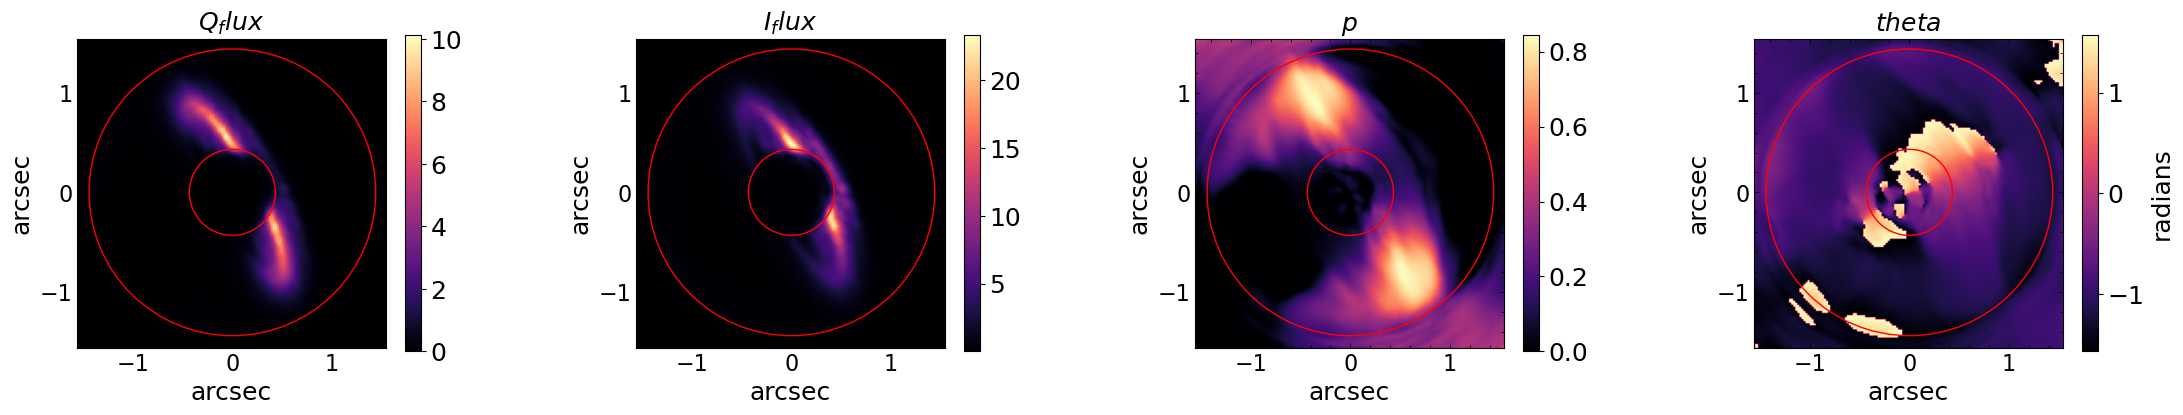

In [84]:
disksimagespol(Inc_dir)